# Representação Geométrica de Vetores e Álgebra Linear no Espaço Vetorial

#### Instalando pacotes necessários para o projeto
!pip install -q pandas_datareader

https://pandas-datareader.readthedocs.io/en/latest

In [13]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import wb

plt.rcParams.update({'font.size': 14})

In [2]:
#versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy"

Author: Data Science Academy



### Estrutura de dados para criação de vetores em python

In [3]:
# cria um vetor como lista em python
dsa_vetor1 = [1, 2, 3]
print(f'type: {type(dsa_vetor1)}')
print(f'shape: {np.shape(dsa_vetor1)}')

type: <class 'list'>
shape: (3,)


In [4]:
# cria um vetor como array NumPy (é muito melhor do que list)
dsa_vetor2 = np.array([1, 2, 3])
print(f'type: {type(dsa_vetor2)}')
print(f'shape: {dsa_vetor2.shape}')

type: <class 'numpy.ndarray'>
shape: (3,)


In [5]:
# cria um vetor de 1 linha com 3 colunas (matriz)
dsa_vetor3 = np.array([ [1, 2, 3] ])
print(f'type: {type(dsa_vetor3)}')
print(f'shape: {dsa_vetor3.shape}')

type: <class 'numpy.ndarray'>
shape: (1, 3)


In [6]:
# cria um vetor de 3 linhas e 1 coluna (matriz)
dsa_vetor4 = np.array([ [1], [2], [3]])
print(f'type: {type(dsa_vetor4)}')
print(f'shape: {dsa_vetor4.shape}')

type: <class 'numpy.ndarray'>
shape: (3, 1)


### Geometria de vetores e representação em python

https://matplotlib.org/stable/users/index.html

In [7]:
# define o vetor

u = np.array([-2, 3])
print(u)

[-2  3]


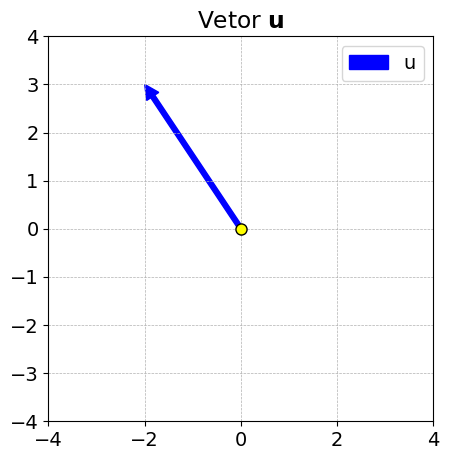

In [8]:
# exemplo 1

#criar figura
plt.figure(figsize=(5, 5))

# definir 3 vetores
# vetor u
vetor1 = plt.arrow(0, #coordenadas do ponto de partida x
                   0, #coordenadas do ponto de partida y
                   u[0], #até onde vai o vetor no eixo x (-2)
                   u[1], #até onde vai o vetor no eixo y (3)
                   head_width=0.3, #comprimento da cabeça da flexa
                   head_length=0.3, 
                   width=0.1,
                   color='blue',
                   length_includes_head=True    
)

# ponto de inicio do vetor
plt.plot(0, 0, 'ko', markerfacecolor='yellow', markersize=8)

# formatação do plot
plt.grid(linestyle='--', linewidth=0.5)
plt.axis('square')
plt.axis([-4, 4, -4, 4]) #delimitação  da escala do quadro
plt.legend([vetor1], ['u'])
plt.title(r'Vetor $\mathbf{u}$') # deixa a letra em negrito (r antes serve para ignorar qualquer scape com string em LaTeX)
plt.savefig('imagens/grafico_01.png', dpi=300) #salva o gráfico em png
plt.show()


Vetores: [[ 3 -2]
 [-1  4]
 [ 2 -3]]
Origens: [[ 0 -1 -2]
 [ 0 -2 -1]]


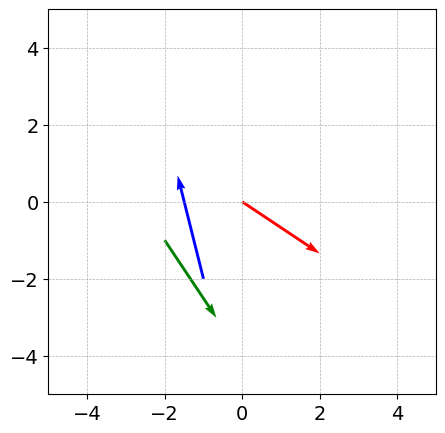

In [9]:
# exemplo 2

#criar figura
plt.figure(figsize=(5, 5))

# cria um array de vetores
vetores = np.array([ [3, -2], [-1, 4], [2, -3] ])
print(f'Vetores: {vetores}')

# cria um array de vetores para as origens
origens = np.array([ [0, -1, -2], [0, -2, -1] ])
print(f'Origens: {origens}')

# plot
plt.quiver(*origens, vetores[:,0], vetores[:,1], color=['r', 'b', 'g'], scale=15)
plt.grid(linestyle='--', linewidth=0.5)

# escala
plt.axis([-5, 5, -5, 5])

# salvar gráfico
plt.savefig('imagens/grafico_02.png', dpi=300, bbox_inches='tight')

plt.show()


### Adição de vetores no espaço vetorial

In [10]:
# define os vetores como array numpy
v1 = np.array([1, 2])
v2 = np.array([4, -6])
soma = v1 + v2
print(f'u:{v1} + v:{v2} = {soma}' )

u:[1 2] + v:[ 4 -6] = [ 5 -4]


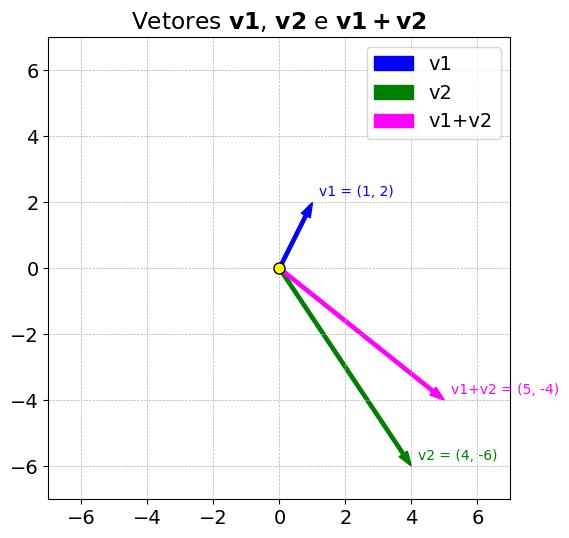

In [11]:
# plot dos 3 vetores

plt.figure(figsize=(6, 6))

vetor1 = plt.arrow(
    0,
    0,
    v1[0],
    v1[1],
    head_width=0.3,
    width=.1,
    color='blue',
    length_includes_head=True
)

vetor2 = plt.arrow(
    0,
    0,
    v2[0],
    v2[1],
    head_width=0.3,
    width=.1,
    color='green',
    length_includes_head=True
)

vetor3 = plt.arrow(
    0,
    0,
    soma[0],
    soma[1],
    head_width=0.3,
    width=.1,
    color='magenta',
    length_includes_head=True
)

plt.plot(0,0, 'ko' , markerfacecolor='yellow', markersize=8)

plt.grid(linestyle='--', linewidth=0.5)
plt.axis('square')
plt.axis([-7, 7, -7, 7])
plt.text(v1[0] + 0.2, v1[1] + 0.2, f'v1 = ({v1[0]}, {v1[1]})', color='blue', fontsize=10)
plt.text(v2[0] + 0.2, v2[1] + 0.2, f'v2 = ({v2[0]}, {v2[1]})', color='green', fontsize=10)
plt.text(soma[0] + 0.2, soma[1] + 0.2, f'v1+v2 = ({soma[0]}, {soma[1]})', color='magenta', fontsize=10)
plt.legend([vetor1, vetor2, vetor3], ['v1', 'v2', 'v1+v2'])
plt.title(r'Vetores $\mathbf{v1}$, $\mathbf{v2}$ e $\mathbf{v1+v2}$')
plt.savefig('imagens/grafico_03.png', dpi=300, bbox_inches='tight')
plt.show()



Propiedades:
O vetor resultante da soma de dois vetores não necessáriamente tem a mesma direção de um dos vetores originais. A direção do vetor resultante depende das magnitudes e direções dos vetores originais. Aqui estão alguns cenários para ilustrar isso:

**Mesma direção e sentido:** Se dois vetores estão na mesma direção e tem o mesmo sentido (ou seja, não são opostos), o vetor resultante também terá a mesma direção e sentido, mas com uma magnitude maior. Por exemplo, somar [2, 2] e [1, 1] resulta em [3, 3], que está na mesma direção e sentido.

**Direções diferentes"** Se os vetores estão em direções diferentes, o vetor resultante terá uma direção que é uma "média" ponderada das direções originais, dependendo das magnitudes dos vetores. Por exemplo, somar [1, 0] e [0, 1] resulta em [1, 1] que está em uma nova direção.

**Vetores opostos:** Se os vetores são exatamente opostos (mesma magnitude, direções opostas), a soma resultará no vetor zero, o qual tecnicamente não tem uma direção definida. Por exemplo, somar [1, 0] e [-1, 0] resulta em [0, 0].

**Um vetor é multiplo do outro:** se um vetor é multiplo escalar do outro, a soma resultará em um vetor que tem a mesma direção de ambos os vetores originais, mas com uma magnitude que é a soma (ou diferença, dependendo do sinal do escalar) das magnitudes. Por exemplo, somar [1, 1] e [-2, 2] resultará em [-1, 1], que está na mesma direção, mas com uma magnitude e sentido diferentes.

Portanto, a direção do vetor resultante da soma de dois vetores depende de suas magnitudes e direções relativas.


| Também podemos somar os vetores da seguinte maneira:

In [20]:
a = np.array([4, 3, 2])
b = np.array([1, 5, 7])
print(f'a = {a} \nb = {b}')

a = [4 3 2] 
b = [1 5 7]


In [14]:
# Cria um array vazio
c = np.empty(3)
c

array([6.40986893, 7.32996556, 6.40986893])

In [ ]:
# também podemos somar vetores assim (resultado em formato Float)
c[0] = a[0] + b[0]
c[1] = a[1] + b[1]
c[2] = a[2] + b[2]
print(c)

[5. 8. 9.]


In [ ]:
# o mesmo que isso (resultado em formato INT)
c = a + b
print(c)

[5 8 9]


### Subtração e vetores no espaço vetorial

In [ ]:
diff = v1 - v2 # v1 - v2
print(diff)


[-3  8]


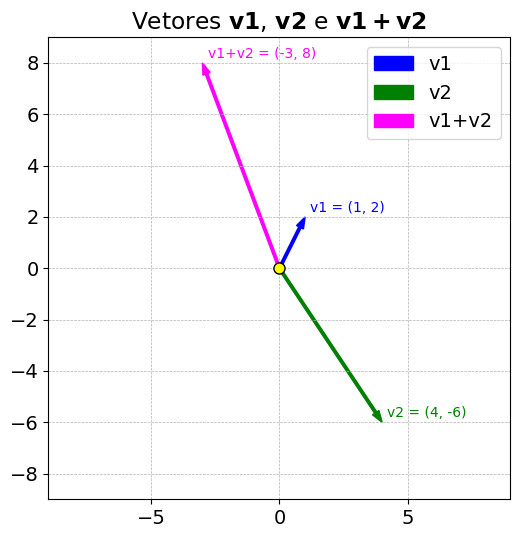

In [28]:
# plot dos 3 vetores

plt.figure(figsize=(6, 6))

vetor1 = plt.arrow(0, 0, v1[0], v1[1], head_width=0.3, width=.1, color='blue', length_includes_head=True)
vetor2 = plt.arrow(0, 0, v2[0], v2[1], head_width=0.3, width=.1, color='green', length_includes_head=True)
vetor3 = plt.arrow(0, 0, diff[0], diff[1], head_width=0.3, width=.1, color='magenta', length_includes_head=True)

plt.plot(0,0, 'ko' , markerfacecolor='yellow', markersize=8)

plt.grid(linestyle='--', linewidth=0.5)
plt.axis('square')
plt.axis([-9, 9, -9, 9])
plt.text(v1[0] + 0.2, v1[1] + 0.2, f'v1 = ({v1[0]}, {v1[1]})', color='blue', fontsize=10)
plt.text(v2[0] + 0.2, v2[1] + 0.2, f'v2 = ({v2[0]}, {v2[1]})', color='green', fontsize=10)
plt.text(diff[0] + 0.2, diff[1] + 0.2, f'v1+v2 = ({diff[0]}, {diff[1]})', color='magenta', fontsize=10)
plt.legend([vetor1, vetor2, vetor3], ['v1', 'v2', 'v1+v2'])
plt.title(r'Vetores $\mathbf{v1}$, $\mathbf{v2}$ e $\mathbf{v1+v2}$')
plt.savefig('imagens/grafico_03.png', dpi=300, bbox_inches='tight')
plt.show()

